El dataset es “Mammographic masses” del conjunto de datos público del repositorio UCI (https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

In [252]:
import numpy as np
import pandas as pd

In [253]:
colnames = ['BI-RADS_ASSESSMENT','AGE', 'SHAPE', 'MARGIN', 'DENSITY', 'SEVERITY']

df = pd.read_csv('mammographic_masses.data', header=None, names=colnames) # Read csv file

#### Copia los datos de df en otro nuevo df_clean

In [254]:
df_clean = df.copy()

In [255]:
df.names       = 'Mammographic Full Dataset'
df_clean.names = 'Mammographic Cleaned Dataset'

#### Muestra las 5 primeras filas

In [256]:
df.head()

,BI-RADS_ASSESSMENT,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,BI-RADS_ASSESSMENT,AGE,SHAPE,MARGIN,DENSITY,NaN
1,5,67,3,5,3,1.0
2,4,43,1,1,?,1.0
3,5,58,4,5,3,1.0
4,4,28,1,1,3,0.0


#### Borra la primera fila con los labels antiguos

In [257]:
df_clean = df.drop(0)

Resultado:

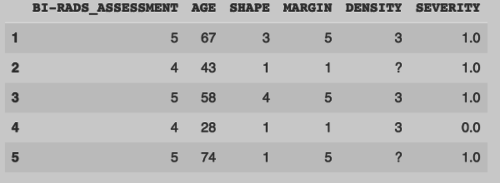

#### Muestra el info() del df

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS_ASSESSMENT  962 non-null    object 
 1   AGE                 962 non-null    object 
 2   SHAPE               962 non-null    object 
 3   MARGIN              962 non-null    object 
 4   DENSITY             962 non-null    object 
 5   SEVERITY            961 non-null    float64
dtypes: float64(1), object(5)
memory usage: 45.2+ KB


Resultado:

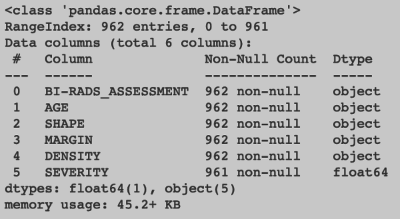

#### Comprueba cuántas filas y columnas tiene el dataframe

In [259]:
df.shape

(962, 6)

Resultado:

(961, 6)

#### Comprueba si faltan valores en alguna columna con isnull()

In [260]:
    ''' Escribe tu código aquí '''
columns_na = df.isna().sum()
columns_na

BI-RADS_ASSESSMENT    0
AGE                   0
SHAPE                 0
MARGIN                0
DENSITY               0
SEVERITY              1
dtype: int64

Resultado:

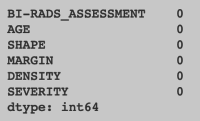

#### Comprueba para cada columna (feature - característica) los valores únicos y cuántos hay de cada

In [261]:
for x in df_clean.columns.tolist():
    print("Análisis para el feature: ", x, "\n")    
    print("Valores únicos: \n")
    print(df[x].unique())
    ''' Escribe tu código aquí '''
    print("Frecuencias de cada valor: ")
    count = df[x].value_counts()
    print (count)
    ''' Escribe tu código aquí ''' 
    print("\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n")

Análisis para el feature:  BI-RADS_ASSESSMENT 

Valores únicos: 

['BI-RADS_ASSESSMENT' '5' '4' '3' '?' '2' '55' '0' '6']
Frecuencias de cada valor: 
4                     547
5                     345
3                      36
2                      14
6                      11
0                       5
?                       2
BI-RADS_ASSESSMENT      1
55                      1
Name: BI-RADS_ASSESSMENT, dtype: int64

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Análisis para el feature:  AGE 

Valores únicos: 

['AGE' '67' '43' '58' '28' '74' '65' '70' '42' '57' '60' '76' '64' '36'
 '54' '52' '59' '40' '66' '56' '75' '63' '45' '55' '46' '39' '81' '77'
 '48' '78' '50' '61' '62' '44' '23' '80' '53' '49' '51' '25' '72' '73'
 '68' '33' '47' '29' '34' '71' '84' '24' '86' '41' '87' '21' '19' '35'
 '37' '79' '85' '69' '38' '32' '27' '83' '88' '26' '31' '?' '18' '82' '93'
 '30' '22' '96' '20']
Frecuencias de cada valo

Resultado:

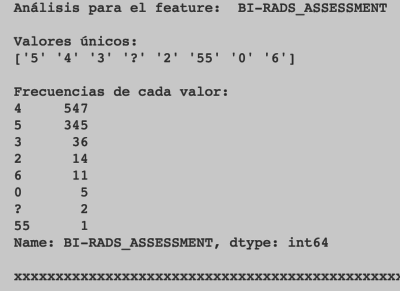

...

#### Clean Existing Columns

Hay algunos valores marcados como '?'. Vamos a convertirlos a nan. Para ello creamos la función cleanFeature()

In [262]:
# Create Function traansforming '?' values into NaN
def cleanFeature(num):
    if num == '?':
        return np.nan
    else:
        return num

Aplicamos la función sobre las columnas implicadas.

In [263]:
# Clean existing features
''' Escribe tu código aquí'''

for x in df_clean.columns:
        df_clean[x] =df_clean[x].apply(cleanFeature)

In [264]:
df_clean.head()

,BI-RADS_ASSESSMENT,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
1,5,67,3,5,3,1.0
2,4,43,1,1,NaN,1.0
3,5,58,4,5,3,1.0
4,4,28,1,1,3,0.0
5,5,74,1,5,NaN,1.0


#### Comprueba cuántos valores NaN tiene cada columna con isna()

In [265]:

    ''' Escribe tu código aquí '''
for x in df_clean.columns:
        print (x,end=" ")
        print(df_clean[x].isna().sum())

BI-RADS_ASSESSMENT 2
AGE 5
SHAPE 31
MARGIN 48
DENSITY 76
SEVERITY 0


#### Elimina las filas que contangan NaN

In [266]:
df_clean = df_clean.dropna()
df_clean.shape

(830, 6)

In [267]:
df_clean.head()

,BI-RADS_ASSESSMENT,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
1,5,67,3,5,3,1.0
3,5,58,4,5,3,1.0
4,4,28,1,1,3,0.0
9,5,57,1,5,3,1.0
11,5,76,1,4,3,1.0


#### Crea una función para convertir la columna AGE en una columna agrupada

In [268]:
def AgeGroup(age):
        if age < 21:
            return 0 # 'Teenager'
        elif age >= 21 and age <=34:
            return 1 # 'YoungAdult'
        elif age >=34 and age<=49:
            return 2 # 'Adult'
        elif age >= 49 and age<=65:
            return 3 # 'OldAdult'
        elif age > 65:
            return 4 # 'Elderly'y

#### Aplica la función a la columna AGE

In [269]:
df_clean = df_clean.astype({'AGE':'int'})
df_clean['AGE'] = df_clean['AGE'].apply(AgeGroup)

#### Comprueba cuántos valores únicos hay para AGE en cada grupo

In [270]:
df_clean['AGE'].value_counts()

3    326
4    231
2    205
1     62
0      6
Name: AGE, dtype: int64

Resultado:

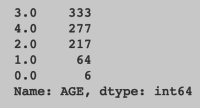

#### Elimina la coumna BI-RADS_ASSESSMENT

In [271]:
df_clean= df_clean.drop("BI-RADS_ASSESSMENT", axis =1)

In [272]:
df_clean.shape

(830, 5)

#### Exporta como CSV el dataframe limpio, con el nombre Mammographic_Data_Cleaned.csv

In [273]:
df_clean.to_csv('Mammographic_Data_Cleaned.csv')